In [1]:
#
import pandas as pd
import re
#
import statsmodels.api as sm
import statsmodels.formula.api as smf
#
import matplotlib.pyplot as plt
import seaborn as sns
#

In [2]:
# Load data and rename the columns
df = pd.read_csv("C:/Users/storm/Desktop/METIS/Project/project 2/laptop_data.csv")
df.columns = ['price','screen_size','processor','memory','storage','os']

In [3]:
df.head(3)

,price,screen_size,processor,memory,storage,os
0,S$999.00,['\nScreen Size:\n15.6 Inch\n'],['\nProcessor Model:\nIntel Core i5-1035G4\n'],['\nMain Memory:\n8GB DDR4\n'],['\nInternal Storage:\n512GB PCIE SSD\n'],['\nOperating System:\nWindow 10 Home\n']
1,"S$1,199.00",['\nScreen Size:\n13.3 Inch\n'],['\nProcessor Model:\n10th Gen Intel Core™ i5-...,['\nMain Memory:\n8GB\n'],['\nInternal Storage:\n512GB PCIe SSD\n'],['\nOperating System:\nWindows® 10 Home\n']
2,"S$1,299.00",['\nScreen Size:\n15.6 Inch FHD\n'],['\nProcessor Model:\ni7-1065G7\n'],['\nMain Memory:\n8GB\n'],['\nInternal Storage:\n256GB SSD\n'],['\nOperating System:\nWindows 10 Home (64bit)...


In [4]:
#
df['price'] = df['price'].str.replace(r'.00', '')
df['price'] = df['price'].str.replace(r'\D+', '').astype(int)
#
df['storage'] = df['storage'].str.replace(r'1TB', '1024')
df['storage'] = df['storage'].str.replace(r'M.2 SSD', '')
df['storage'] = df['storage'].str.replace(r'M2 PCIE', '')
df['storage'] = df['storage'].str.replace(r'\D+', '').astype(int)
#
df['memory'] = df['memory'].str.replace(r'DDR4', '')
df['memory'] = df['memory'].str.replace(r'DDR3', '')
df['memory'] = df['memory'].str.replace(r'\D+', '').astype(int)

In [5]:
df['screen_size'] = df['screen_size'].str.replace('3', '' ,regex = True)
df['screen_size'] = df['screen_size'].str.replace('15.6', '15' ,regex = True)
df['screen_size'] = df['screen_size'].str.replace(r'\D+', '')
df['screen_size'] = df['screen_size'].str.replace('0', '' ,regex = True).astype(int)
df.screen_size[df.screen_size==1] = 13

C:\Users\storm\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [6]:
df['processor'] = df['processor'].str.replace('-1035G4', '')
df['processor'] = df['processor'].str.replace('1065G7', '')
df['processor'] = df['processor'].str.replace('1035G1', '')
df['processor'] = df['processor'].str.replace('10750H', '')
df['processor'] = df['processor'].str.replace('10510U', '')
df['processor'] = df['processor'].str.replace('10210U', '')
df['processor'] = df['processor'].str.replace('9750H', '')
df['processor'] = df['processor'].str.replace('8565U', '')
df['processor'] = df['processor'].str.replace('1', '')
df['processor'] = df['processor'].str.replace(r'\D+', '')
df['processor'] = df['processor'].str.replace('0357', '')
df['processor'] = df['processor'].str.replace('26245', '')
df['processor'] = df['processor'].str.replace('6426', '')
df['processor'] = df['processor'].str.replace('0', '')
df['processor'] = df['processor'].str.replace('8', '').astype(int)
df.processor[df.processor ==4 ] = 5


C:\Users\storm\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [7]:
df['os'] = df['os'].str.replace('Window 10', '2')
df['os'] = df['os'].str.replace('10 Home', '2')
df['os'] = df['os'].str.replace('64', '')
df['os'] = df['os'].str.replace('Windows 10', '2')
df['os'] = df['os'].str.replace('Professional', '7')
df['os'] = df['os'].str.replace(r'\D+', '')
df['os'] = df['os'].str.replace('27', 'pro')
df['os'] = df['os'].str.replace('2', 'home')

In [8]:
df.head()

,price,screen_size,processor,memory,storage,os
0,999,15,5,8,512,home
1,1199,13,5,8,512,home
2,1299,15,7,8,256,home
3,1349,14,5,16,512,home
4,1399,13,7,8,512,home


In [9]:
df.to_excel (r'laptop_data_cleaned.xlsx', index = False, header=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   price        32 non-null     int32 
 1   screen_size  32 non-null     int32 
 2   processor    32 non-null     int32 
 3   memory       32 non-null     int32 
 4   storage      32 non-null     int32 
 5   os           32 non-null     object
dtypes: int32(5), object(1)
memory usage: 1.0+ KB


In [11]:
df = pd.get_dummies(df) 


In [12]:
df.head()


,price,screen_size,processor,memory,storage,os_home,os_pro
0,999,15,5,8,512,1,0
1,1199,13,5,8,512,1,0
2,1299,15,7,8,256,1,0
3,1349,14,5,16,512,1,0
4,1399,13,7,8,512,1,0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np


In [14]:
#Separate our features from our target & remove one dummy variable out

X, y = df.drop(['price','os_home'],axis=1), df['price']

#Split the data 60 - 20 - 20 train/val/test

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)


In [15]:
#set up the LM models: (initial benchmark) for validation with other model if there are

lm = LinearRegression()

lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

Linear Regression val R^2: -0.280


In [16]:
#retrain on the entire chunk of train/val data and see how it does on test data:

lm = LinearRegression()

lm.fit(X_train_val, y_train_val)
print(f'Linear Regression val R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression val R^2: -0.306


In [17]:
model = sm.OLS(y_train_val, X_train_val)
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              106.1
Date:                Tue, 19 May 2020   Prob (F-statistic):                    1.08e-13
Time:                        02:15:29   Log-Likelihood:                         -178.67
No. Observations:                  25   AIC:                                      367.3
Df Residuals:                      20   BIC:                                      373.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
screen_size    58.5445     28.160      2.079      0.051      -0.197     117.286
processor      68.4905     69.552      0.985      0.337     -76.591     213.572
memory         32.6575     19.173      1.703      0.104      -7.336      72.651
storage        -0.0579      0.257     -0.226      0.824      -0.593       0.477
os_pro        106.0503    372.913      0.284      0.779    -671.832     883.933
==============================================================================
Omnibus:                       10.736   Durbin-Watson:                   2.337
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.984
Skew:                           1.225   Prob(JB):                       0.0112
Kurtosis:                       4.619   Cond. No.                     4.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
ypred = results.predict(X_test)
print(ypred)

29    1530.689729
15    1285.299293
24    1850.494248
17    1364.081311
8     1472.145183
9     1472.145183
30    1791.949703
dtype: float64


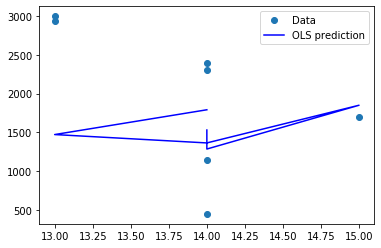

In [19]:
fig, ax = plt.subplots()
ax.plot(X_test.screen_size, y_test, 'o', label="Data")
ax.plot(X_test.screen_size, ypred, 'b-', label="OLS prediction")

ax.legend(loc="best");

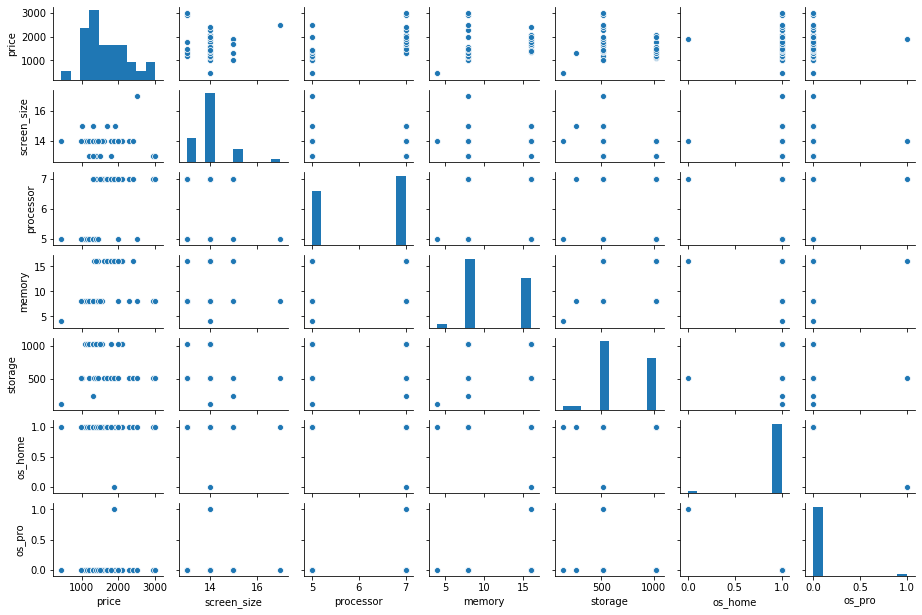

In [20]:
sns.pairplot(df, height=1.2, aspect=1.5);

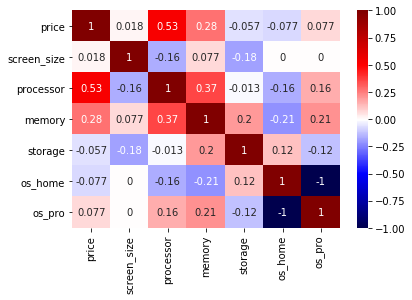

In [21]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.savefig("project2_corr_heatmap")

In [22]:
df.corr()

,price,screen_size,processor,memory,storage,os_home,os_pro
price,1.000000,0.018354,0.530683,0.275632,-0.056797,-0.076885,0.076885
screen_size,0.018354,1.000000,-0.159364,0.077303,-0.181388,0.000000,0.000000
processor,0.530683,-0.159364,1.000000,0.365728,-0.012647,-0.158397,0.158397
memory,0.275632,0.077303,0.365728,1.000000,0.200249,-0.214037,0.214037
storage,-0.056797,-0.181388,-0.012647,0.200249,1.000000,0.121050,-0.121050
os_home,-0.076885,0.000000,-0.158397,-0.214037,0.121050,1.000000,-1.000000
os_pro,0.076885,0.000000,0.158397,0.214037,-0.121050,-1.000000,1.000000


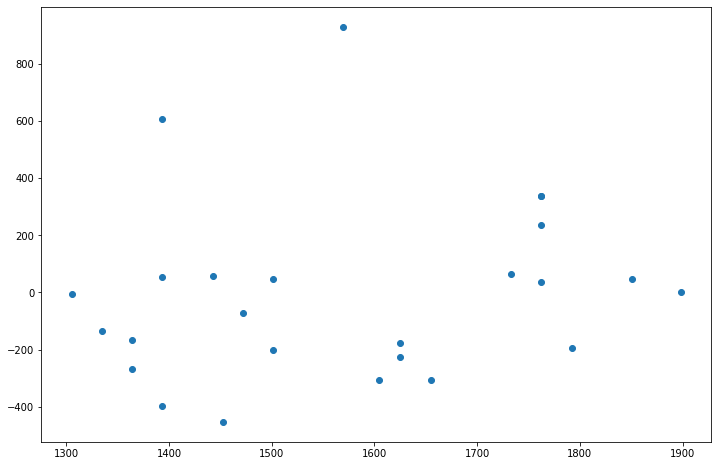

In [23]:
# Use statsmodels to plot the residuals vs the fitted values

plt.figure(figsize=(12,8))
plt.scatter(results.predict(), results.resid);